In [23]:
import pandas as pd
import numpy as np
import os
from plotnine import *
import matplotlib.pyplot as plt
import csv

In [24]:
import matplotlib.font_manager
from IPython.core.display import HTML

# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [25]:
ann_T = [60, 80, 100, 120, 140] 
labels = ["DCV5T:C60 [2:1] 60°C", "DCV5T:C60 [2:1] 80°C", "DCV5T:C60 [2:1] 100°C", "DCV5T:C60 [2:1] 120°C", "DCV5T:C60 [2:1] 140°C"]
corr_len = [21.2, 27.8, 25.2, 40.5, 54.8]
corr_err = [0.5, 1.8, 0.5, 0.6, 1.4 ]
plt.rcParams['font.family'] = 'Nimbus Sans'

In [26]:
# data = {
#     'ann_T': ann_T,
#     'labels': labels,
#     'corr_len': corr_len,
#     'corr_err': corr_err
# }

# df = pd.DataFrame(data)

In [27]:
# plt.errorbar(ann_T, corr_len, yerr=corr_err, fmt='o', capsize=4)
# plt.xlabel('Annealing temp (°C)')
# plt.ylabel('Correlation Length (nm)')
# plt.title('DCV5T:C60 domain sizes with \n Debye-Anderson-Brumberger Model')
# plt.show()

/home/goughl/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 6 in image.
/home/goughl/anaconda3/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /home/goughl/Documents/beamtime_data/2304_ISIS/poster_fit_example/domainsizes_posterfig.png


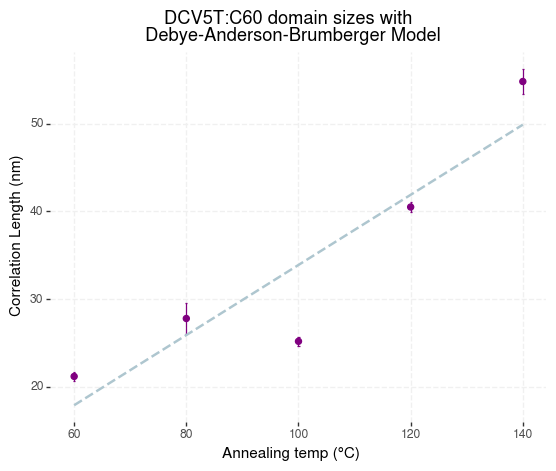

In [60]:

df = pd.DataFrame({'ann_T': ann_T, 'corr_len': corr_len, 'corr_err': corr_err, 'labels': labels})

# Set the size of the plot in inches
width_inches = 8
height_inches = 6
resolution = 300

# Create the plot
plot = (
    ggplot(df, aes(x='ann_T', y='corr_len')) +
    geom_errorbar(aes(ymin='corr_len - corr_err', ymax='corr_len + corr_err'), width=0.4, color='purple') +
    geom_point(color='purple', size=2) +
    geom_smooth(method='lm', se=False, color='#AEC6CF', linetype='dashed') +  # Add linear fit with red color
    labs(x='Annealing temp (°C)', y='Correlation Length (nm)', title='DCV5T:C60 domain sizes with \n Debye-Anderson-Brumberger Model') +
    theme(
        text=element_text(family='Nimbus Sans'),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_line(color='#F0F0F0', linetype='dashed'),
        panel_grid_minor=element_blank()
    )
)
# Set the size of the plot
plot.save(r"/home/goughl/Documents/beamtime_data/2304_ISIS/poster_fit_example/domainsizes_posterfig.png", width=width_inches, height=height_inches, dpi=resolution)

# Show the plot
print(plot)


In [29]:
df_actual = pd.read_csv(r"/home/goughl/Documents/beamtime_data/2304_ISIS/poster_fit_example/datapoints_example.csv")
df_fitted = pd.read_csv(r"/home/goughl/Documents/beamtime_data/2304_ISIS/poster_fit_example/fitexample.csv")

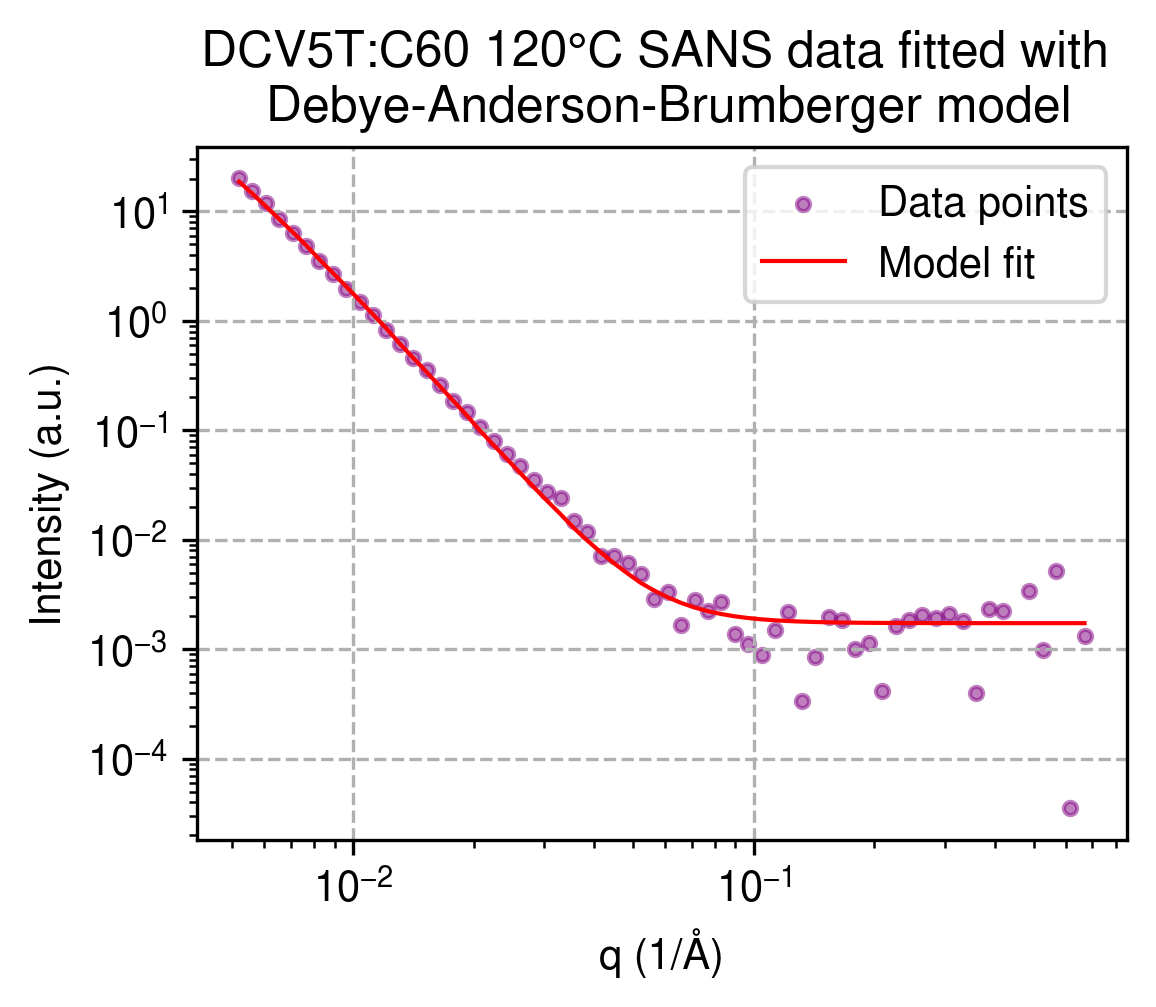

In [58]:
x_actual = []
y_actual = []

with open(r"/home/goughl/Documents/beamtime_data/2304_ISIS/poster_fit_example/datapoints_example.csv", 'r') as file:
    reader = csv.reader(file)
    next(reader) 
    for row in reader:
        x_actual.append(float(row[0]))
        y_actual.append(float(row[1]))

x_fitted = []
y_fitted = []

with open(r"/home/goughl/Documents/beamtime_data/2304_ISIS/poster_fit_example/fitexample.csv", 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        x_fitted.append(float(row[0]))
        y_fitted.append(float(row[1]))

# plot size in inches (comment out when not saving stuff)
width_inches = 4 
height_inches = 3  
resolution = 300       
fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=resolution)


plt.scatter(x_actual, y_actual, color='purple', s=10, alpha=0.5, label='Data points')
plt.plot(x_fitted, y_fitted, color='red', linewidth=1, label='Model fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('q (1/Å)')
plt.ylabel('Intensity (a.u.)')
plt.title('DCV5T:C60 120°C SANS data fitted with \n Debye-Anderson-Brumberger model')
plt.legend()
plt.grid(True, linestyle='dashed')




# Plot your data and customize the plot as needed

# Save the plot as an image
plt.savefig(r"/home/goughl/Documents/beamtime_data/2304_ISIS/poster_fit_example/fitexample_posterfig.png", dpi=resolution, bbox_inches='tight')

plt.show()